In [1]:
%matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [59]:
class body:
    acceleration = 0
    track = []
    
    def __init__(self, name, mass, location, velocity):
        self.name = name
        self.mass = mass
        self.location = location
        self.velocity = velocity

class nbody:
    G = 6.67408*10**-11
    dt = 10**-6
    dx = 10**-9
    
    hamiltonian=[];
    
    def __init__(self, bodies):
        self.number_of_body = len(bodies)
        self.bodies = bodies
    
    def add_body(self, bodies):
        for b in bodies:
            self.bodies.append(b)
            self.number_of_body+=1
            
    def delete_body(self, names):
        for name in names:
            for b in self.bodies:
                if b.name == name:      
                    print("successful delete bodies")
                    self.bodies.remove(b)
                    self.number_of_body-=1;
                    
    def update_acceleration(self):
        for i in range(self.number_of_body):
            self.bodies[i].acceleration = 0
            for j in range(self.number_of_body):
                if i !=j:
                    distance = self.bodies[i].location - self.bodies[j].location
                    if np.isclose(np.any(distance), 0):
                        print(self.bodies[i].name, "and ", self.bodies[j].name, "collapse")
                        self.bodies[i].acceleration -= self.G*self.bodies[j].mass/np.linalg.norm\
                        (distance + self.dx, 2)**3*(distance + self.dx)
                    else:
                        self.bodies[i].acceleration -= self.G*self.bodies[j].mass/np.linalg.norm\
                        (distance, 2)**3*distance
                    
    def simulate(self, terminal_time):
        n = np.int(terminal_time/self.dt)
        step_n=0
        
        for body in self.bodies:
            body.track = np.zeros([n,3])
        self.hamiltonian.append(self.Hamiltonian())
        
        '''
        ham = 0
        for i in range(self.number_of_body):
            self.bodies[i].track = np.zeros([n,3])
            self.bodies[i].track[0] = self.bodies[i].location
            ham += np.linalg.norm(self.bodies[i].velocity, 2)**2*self.bodies[i].mass/2
            for j in range(i+1, self.number_of_body):
                ham -= self.G*self.bodies[i].mass*self.bodies[j].mass/np.linalg.norm\
                    (self.bodies[i].location-self.bodies[j].location, 2)
        hamiltonian.append(ham)
        '''
        
        step_n=0
        while(step_n<n):
            
            for body in self.bodies:
                body.location += body.velocity*self.dt
                body.track[step_n] = body.location

            self.update_acceleration()

            for body in self.bodies:       
                body.velocity += body.acceleration*self.dt
                
            self.hamiltonian.append(self.Hamiltonian())
            step_n+=1
    def Hamiltonian(self):
        ham = 0
        for i in range(self.number_of_body):
            ham += np.linalg.norm(self.bodies[i].velocity, 2)**2*self.bodies[i].mass/2
            for j in range(i+1, self.number_of_body):
                distance = self.bodies[i].location - self.bodies[j].location
                
                if np.isclose(np.any(distance), 0):
                    print(self.bodies[i].name, "and ", self.bodies[j].name, "collapse")
                    ham -= self.G*self.bodies[i].mass*self.bodies[j].mass/np.linalg.norm\
                    (distance+self.dx, 2)
                else:
                    ham -= self.G*self.bodies[i].mass*self.bodies[j].mass/np.linalg.norm\
                    (distance, 2)
                        
                
        return ham
    
    def show_track(self):
        mpl.rcParams['legend.fontsize'] = 10
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        
        for body in self.bodies:
            track = body.track.transpose()

            ax.plot(track[0], track[1], track[2], label='parametric curve')
            ax.legend()

            plt.show()


In [60]:
l1 = np.array([1.,2.,3.])
l2 =np.array([2.,2.,3.]) 
l3 =np.array([3.,1.,2.]) 
b1 = body("earth",10000000000, l1,np.array([.1,.2,1.]))
b2 = body("earth",1000000, l2,np.array([0.,0.,0.])) 
b3 = body("earth",10000000000, l3,np.array([.3,.5,.6])) 

nb = nbody([b1,b3])

nb.add_body([b2])
nb.dt = 10**-5


In [61]:
nb.simulate(1)

<IPython.core.display.Javascript object>


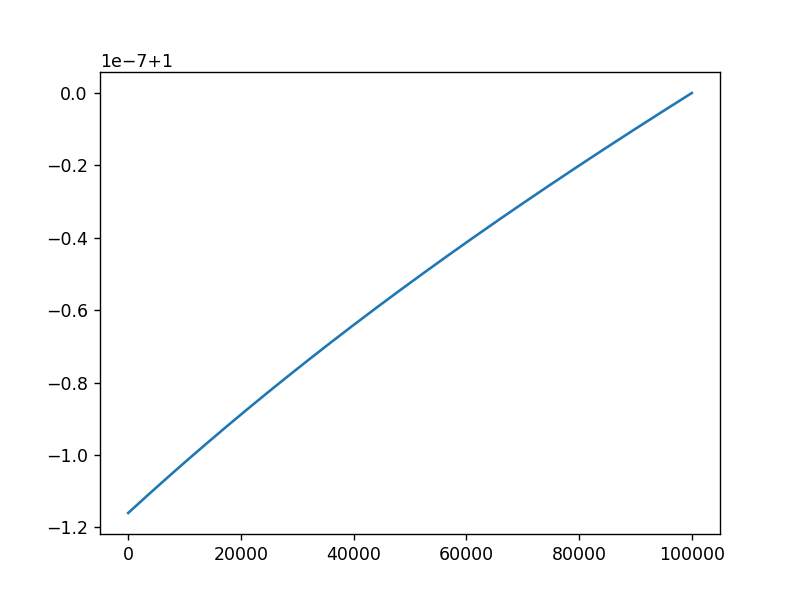

In [62]:
nb.show_track()


In [63]:
plt.clf()
plt.plot(nb.hamiltonian/np.max(nb.hamiltonian))